<a href="https://colab.research.google.com/github/ayaz-ncr/100ml/blob/master/10_ticket_text_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from google.colab import files
uploaded = files.upload()

Saving Tickets-APAC.csv to Tickets-APAC.csv


In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
# Importing the dataset

df = pd.read_csv('Tickets-APAC.csv', encoding = 'Latin_1')


In [6]:
dataset =   df.loc[:, ['Summary']]


In [15]:
dataset.head()

,Summary
0,Deskphone - Issue with outgoing calls to china
1,Laptop - Asset replacement
2,[ADMINPASSWORD]Laptop - Chinese Handwriting IM...
3,[EN]WINDOWS 10 - Migration issue
4,PC Infected with Malware


In [17]:
type(dataset)

pandas.core.frame.DataFrame

In [8]:
# Cleaning the texts
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in dataset.index:
    desc = re.sub('[^a-zA-Z]', ' ', dataset['Summary'][i])
    desc = desc.lower()
    desc = desc.split()
    ps = PorterStemmer()
    desc = [ps.stem(word) for word in desc if not word in set(stopwords.words('english'))]
    desc = ' '.join(desc)
    corpus.append(desc)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer    
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(corpus).toarray()
X1 = vectorizer.fit_transform(corpus)
#print(X)

In [38]:
type(X1)

scipy.sparse.csr.csr_matrix

In [35]:
from sklearn.cluster import KMeans
true_k = 10
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=10, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
#terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print


In [48]:
# Visualize clusters
#predict the labels of clusters.
label = model.predict(X) 


In [42]:
label

array([0, 0, 0, ..., 0, 0, 1], dtype=int32)

In [43]:
#Getting unique labels
u_labels = np.unique(label)
 
u_labels


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

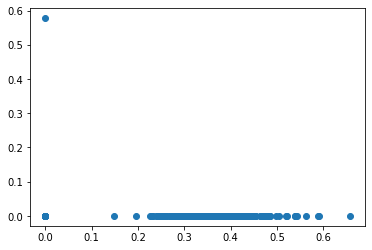

In [45]:
#filter rows of original data
filtered_label0 = X[label == 0]
 
#plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
plt.show()

In [47]:
filtered_label0.shape

(5397, 2764)

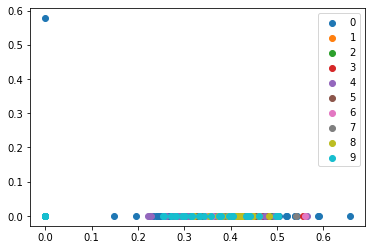

In [44]:
#plotting the results:
for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.legend()
plt.show()

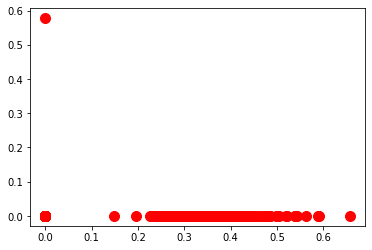

In [50]:
# Visualising the clusters (method 2)
plt.scatter(X[label == 0, 0], X[label == 0, 1], s = 100, c = 'red', label = 'Cluster 1')


In [51]:
#Importing required modules
 
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
 


In [53]:
#Load Data
data = load_digits().data
pca = PCA(2)
type(data)
 


numpy.ndarray

In [55]:
data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [56]:
#Transform the data
df1 = pca.fit_transform(X)
 
df1.shape

(10891, 2)

In [59]:
#Import required module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 10)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df1)
 
print(label)

[1 1 1 ... 1 1 2]


In [60]:
label

array([1, 1, 1, ..., 1, 1, 2], dtype=int32)

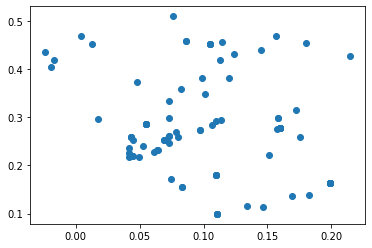

In [61]:
import matplotlib.pyplot as plt
 
#filter rows of original data
filtered_label0 = df1[label == 0]
 
#plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
plt.show()

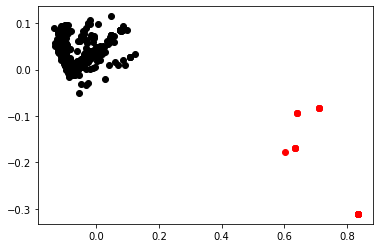

In [63]:
#filter rows of original data
filtered_label2 = df1[label == 2]
 
filtered_label8 = df1[label == 8]
 
#Plotting the results
plt.scatter(filtered_label2[:,0] , filtered_label2[:,1] , color = 'red')
plt.scatter(filtered_label8[:,0] , filtered_label8[:,1] , color = 'black')
plt.show()

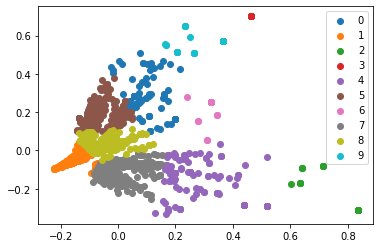

In [64]:
#Getting unique labels
 
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df1[label == i , 0] , df1[label == i , 1] , label = i)
plt.legend()
plt.show()

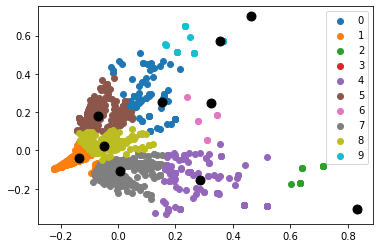

In [66]:
#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df1[label == i , 0] , df1[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

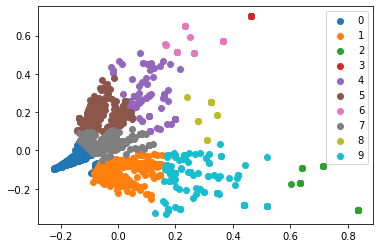

In [67]:
#Importing required modules
 
#from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
 
#Load Data
data = X
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(data)
 
#Import KMeans module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 10)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df)
 
#Getting unique labels
u_labels = np.unique(label)
 
#plotting the results:
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

In [ ]:
# Visualising the clusters (method 3)
plt.scatter(X[label == 0, 0], X[label == 0, 1], s = 100, c = 'red', label = 'Cluster 1')


In [18]:
dataset1 = dataset.values.tolist()

In [9]:
import gensim 
from gensim import corpora


In [19]:
dictionary = corpora.Dictionary(dataset1)
print("\n dictionary => ",dictionary)



 dictionary =>  Dictionary(10159 unique tokens: ['Deskphone - Issue with outgoing calls to china', 'Laptop - Asset replacement', '[ADMINPASSWORD]Laptop - Chinese Handwriting IME Pad not working', '[EN]WINDOWS 10 - Migration issue', 'PC Infected with Malware']...)


In [20]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in dataset1]
print("\n doc_term_matrix => ",doc_term_matrix)



 doc_term_matrix =>  [[(0, 1)], [(1, 1)], [(2, 1)], [(3, 1)], [(4, 1)], [(5, 1)], [(6, 1)], [(7, 1)], [(8, 1)], [(9, 1)], [(10, 1)], [(11, 1)], [(12, 1)], [(13, 1)], [(14, 1)], [(15, 1)], [(16, 1)], [(17, 1)], [(18, 1)], [(19, 1)], [(20, 1)], [(21, 1)], [(22, 1)], [(23, 1)], [(24, 1)], [(25, 1)], [(26, 1)], [(27, 1)], [(28, 1)], [(29, 1)], [(30, 1)], [(31, 1)], [(32, 1)], [(33, 1)], [(34, 1)], [(35, 1)], [(36, 1)], [(37, 1)], [(38, 1)], [(39, 1)], [(40, 1)], [(41, 1)], [(42, 1)], [(43, 1)], [(44, 1)], [(45, 1)], [(46, 1)], [(47, 1)], [(48, 1)], [(49, 1)], [(50, 1)], [(51, 1)], [(52, 1)], [(53, 1)], [(54, 1)], [(55, 1)], [(56, 1)], [(57, 1)], [(58, 1)], [(59, 1)], [(60, 1)], [(61, 1)], [(62, 1)], [(63, 1)], [(64, 1)], [(65, 1)], [(66, 1)], [(67, 1)], [(68, 1)], [(69, 1)], [(70, 1)], [(71, 1)], [(72, 1)], [(73, 1)], [(74, 1)], [(75, 1)], [(76, 1)], [(77, 1)], [(78, 1)], [(79, 1)], [(80, 1)], [(81, 1)], [(82, 1)], [(83, 1)], [(84, 1)], [(85, 1)], [(86, 1)], [(87, 1)], [(88, 1)], [(89, 1)

In [23]:
Lda = gensim.models.ldamodel.LdaModel

ldamodel = Lda(doc_term_matrix, num_topics = 10, id2word = dictionary, passes = 50)


In [24]:
topics = ldamodel.print_topics()

print("\n topics => ",topics)



 topics =>  [(0, '0.004*"[EN] - Smartcard - Need to unlock" + 0.003*"Adobe - Sign in" + 0.003*"Browser - unable to open page" + 0.002*"Jabber - Unable to make calls" + 0.002*"sap issue" + 0.002*"sccm" + 0.002*"Adobe Acrobat - Inquiry" + 0.002*"Outlook - unable to access" + 0.002*"vpn issue" + 0.002*"Smartcard - request to unblock"'), (1, '0.006*"Maintain Physical Address - Updating contact number#AA" + 0.004*"HR Kiosk - Unable to login" + 0.002*"Keeper-migration assistance request" + 0.002*"java issue" + 0.002*"gpc issue" + 0.002*"[EN] Smartcard - blocked / not able to login" + 0.002*"[EN] - Laptop - Microphone not working" + 0.002*"Cisco Jabber - softphone functionality not working" + 0.002*"[ADMINPASSWORD] Laptop - PC Infected with Malware" + 0.001*"Outlook-trying to connect error"'), (2, '0.011*"[ADMINPASSWORD] PC Infected with Malware" + 0.010*"Ghost Call" + 0.006*"[Ghost Chat]" + 0.004*"SAP Z2L Password Reset" + 0.003*"Smartcard - Needs help to unblock" + 0.002*"Network connectio